<a href="https://colab.research.google.com/github/Aravindkumar-Rajendran/EVA/blob/master/Session_2_second_asgmnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [1]:
# https://keras.io/
#!pip install -q keras

#importing the Keras - a deep learning framework to the colab
import keras

Using TensorFlow backend.


In [0]:
#importing the numpy library 
import numpy as np

#importing the useful function from keras for creating a neural network model
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

#importing mnist dataset
from keras.datasets import mnist

In [3]:
#saving the datasets as training and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


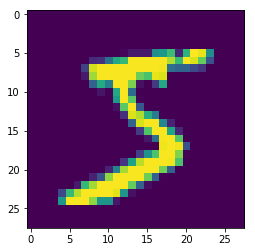

In [4]:
#Viewing the shape of the train sets
print (X_train.shape)

#import matplot library for plotting the image
from matplotlib import pyplot as plt
#configuring matplotlib
%matplotlib inline

#Code to display the first image in the training set
plt.imshow(X_train[0])

In [5]:
#Reshaping the datasets as (60000, 28, 28, 1) from (60000, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
#Normalizing the datasets
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

#Converting the labels to One-hot vector
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
#importing activation and max polling layers
from keras.layers import Activation, MaxPooling2D


#Defining a neural network with Sequential function of keras
model = Sequential() 

#Adding first convolution layer to the model with 3 x 3 kernel input shape: 28 x 28 x 1
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

#Output shape: 26 x 26 x 32
#Receptive field: 3 x 3 
#Adding 2nd convolution layer to the model with (3 x 3 x 32) x 64 kernel
model.add(Convolution2D(64, 3, 3, activation='relu'))

#Output shape: 24 x 24 x 64
#Receptive field: 5 x 5
#Adding 3nd convolution layer to the model with (3 x 3 x 64 x 128) kernel
model.add(Convolution2D(128, 3, 3, activation='relu'))

#Output shape: 22 x 22 x 128
#Receptive field: 7 x 7
#Adding max pooling layer to the model of size 2 x 2
model.add(MaxPooling2D(pool_size=(2, 2)))

#Output shape: 11 x 11 x 128
#Receptive field: 14 x 14
#Adding 4th convolution layer to the model with 3 x 3 x 128 x 256 kernel
model.add(Convolution2D(256, 3, 3, activation='relu'))

#Output shape: 9 x 9 x 256
#Receptive field: 16 x 16
#Adding 5th convolution layer to the model with 3 x 3 x 256 x 512 kernel
model.add(Convolution2D(512, 3, 3, activation='relu'))


#Output shape: 7 x 7 x 512
#Receptive field: 18 x 18
#Adding 6th convolution layer to the model with 3 x 3 x 512 x 1024 kernel
model.add(Convolution2D(1024, 3, 3, activation='relu'))


#Output shape: 5 x 5 x 1024
#Receptive field: 20 x 20
#Adding 7th convolution layer to the model with 3 x 3 x 1024 x 2048 kernel
model.add(Convolution2D(2048, 3, 3, activation='relu'))

#Output shape: 3 x 3 x 2048
#Receptive field: 22 x 22
#Adding 8th convolution layer to the model with 3 x 3 x 2048 x 10 kernel
model.add(Convolution2D(10, 3, 3))

#Output shape: 1 x 1 x 10
#Receptive field: 24 x 24
#Flattening the output of the convolution layer
model.add(Flatten())

#Output size : 10 neurons
#Adding softmax activation function
model.add(Activation('softmax'))


#Displays the architecture of the model as a table
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
#compiling the model with "categorical cross entropy" - loss function, with Adam optimizer and setting Accuract as metrics
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# Training the model with training set with batch_size = 32 , Number of epochs = 10 , Verbose (display of training) as True 
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.1502 - acc: 0.9537
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0558 - acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0420 - acc: 0.9878
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0342 - acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0283 - acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0281 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0214 - acc: 0.9940
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0218 - acc: 0.9942
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0186 - acc: 0.9949
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0192 - a

In [0]:
#Evaluating the model with test set
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
print(score)

[0.031836999246153116, 0.9919]


In [0]:
#Making a inference in the test set
y_pred = model.predict(X_test)

In [16]:
#Printing the predicted output and actual output of first 9 items in the test set
print(y_pred[:9])
print(y_test[:9])

[[9.14285466e-13 2.52064869e-10 5.11684140e-10 2.54430876e-09
  9.82869272e-11 1.00392828e-11 1.23556352e-16 9.99998927e-01
  1.17713062e-10 1.10539236e-06]
 [6.74565893e-19 1.28425849e-18 1.00000000e+00 4.57243534e-23
  1.97329467e-19 1.01270543e-25 4.62909916e-18 1.40953858e-21
  2.38496581e-18 3.33124877e-28]
 [7.52723960e-14 9.99999881e-01 3.03345751e-11 4.87057877e-13
  1.41256673e-09 5.48866126e-11 8.18226644e-14 1.46229752e-07
  1.14157246e-10 5.53758645e-12]
 [9.99999762e-01 3.25257670e-14 4.02947176e-10 1.27922062e-09
  4.20217246e-12 4.99783548e-11 2.51255699e-07 3.64764247e-10
  1.74241810e-09 1.80565202e-10]
 [1.75199456e-11 8.26532232e-10 8.90735456e-13 1.33486208e-11
  1.00000000e+00 7.42482811e-11 1.57738322e-10 9.90938664e-10
  4.75536208e-11 1.92127603e-09]
 [1.94553263e-13 9.99999762e-01 3.60032426e-09 1.52544738e-13
  6.82333301e-09 2.32227276e-11 2.24261975e-13 2.15251276e-07
  2.75319073e-10 4.19877744e-11]
 [9.46146717e-10 4.57289843e-06 8.85989664e-07 1.37184259e